# TIPPER PROBLEM
---

```julia
versioninfo() # -> v"1.11.1"
```

In [1]:
cd(@__DIR__)

In [2]:
import Pkg; Pkg.activate("..")

  Activating project at `~/Work/git-repos/AI-ML-DL/jlai/Codes/Julia/Part-1`


Import required librairies

In [3]:
using Fuzzy
using Plots

`score` denotes the horizontal axis

In [4]:
score = range(0, 10, length=100)

0.0:0.10101010101010101:10.0

`food` is the 1st fuzzy input

In [5]:
food = Dict(
	    "Rancid" => TrapezoidalMF(0, 0, 2, 4),
	    "Delicious" => TrapezoidalMF(6, 8, 10, 10)
	    )

Dict{String, TrapezoidalMF} with 2 entries:
  "Rancid"    => TrapezoidalMF(0, 0, 2, 4)
  "Delicious" => TrapezoidalMF(6, 8, 10, 10)

In [6]:
food_chart = chart_prepare(food, score)

Dict{String, Array} with 2 entries:
  "names"  => ["Rancid" "Delicious"]
  "values" => [[NaN, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  0.0, 0.0, …

`service` is the 2nd fuzzy input

In [7]:
service = Dict(
	    "Poor" => TrapezoidalMF(0, 0, 2, 4),
	    "Good" => TrapezoidalMF(3, 4, 6, 7),
	    "Excellent" => TrapezoidalMF(6, 8, 10, 10)
	    )

Dict{String, TrapezoidalMF} with 3 entries:
  "Excellent" => TrapezoidalMF(6, 8, 10, 10)
  "Poor"      => TrapezoidalMF(0, 0, 2, 4)
  "Good"      => TrapezoidalMF(3, 4, 6, 7)

In [8]:
service_chart = chart_prepare(service, score)

Dict{String, Array} with 2 entries:
  "names"  => ["Excellent" "Poor" "Good"]
  "values" => [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  1.0, 1.0, …

`tip` is the fuzzy output

In [9]:
tip = Dict(
	   "Cheap" => TrapezoidalMF(0, 0, 1, 3),
	   "Average" => TrapezoidalMF(2, 4, 6, 8),
	   "Generous" => TrapezoidalMF(7, 9, 10, 10)
	    )

Dict{String, TrapezoidalMF} with 3 entries:
  "Cheap"    => TrapezoidalMF(0, 0, 1, 3)
  "Average"  => TrapezoidalMF(2, 4, 6, 8)
  "Generous" => TrapezoidalMF(7, 9, 10, 10)

In [10]:
tip_chart = chart_prepare(tip, score)

Dict{String, Array} with 2 entries:
  "names"  => ["Cheap" "Average" "Generous"]
  "values" => [[NaN, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  0.0, 0.0, …

Design the rules set"

In [11]:
rule_1 = Rule(["Rancid", "Poor"], "Cheap", "MAX")
rule_2 = Rule(["", "Good"], "Average", "MAX")
rule_3 = Rule(["Delicious", "Excellent"], "Generous", "MAX")

Rule(AbstractString["Delicious", "Excellent"], "Generous", "MAX")

`rules` aggregates all individual rules"

In [12]:
rules = [rule_1, rule_2, rule_3]

3-element Vector{Rule}:
 Rule(AbstractString["Rancid", "Poor"], "Cheap", "MAX")
 Rule(AbstractString["", "Good"], "Average", "MAX")
 Rule(AbstractString["Delicious", "Excellent"], "Generous", "MAX")

Plot the fuzzy membership variables"

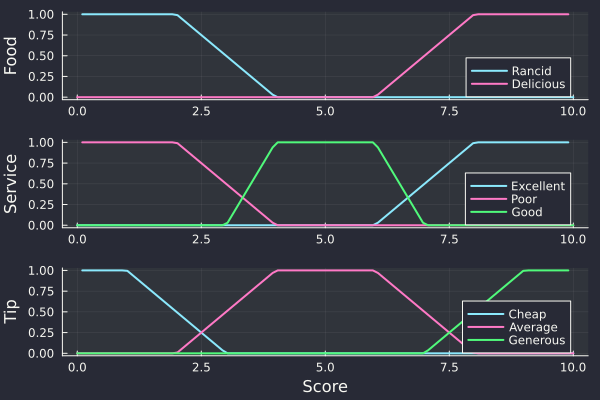

In [13]:
#= GRAPHS =#
p1 = plot(score, food_chart["values"], ylabel="Food", label=food_chart["names"], legend=:bottomright)
p2 = plot(score, service_chart["values"], ylabel="Service", label=service_chart["names"], legend=:bottomright)
p3 = plot(score, tip_chart["values"], xlabel="Score", ylabel="Tip", label=tip_chart["names"], legend=:bottomright)
graphs = plot(p1, p2, p3, layout=(3, 1), lw=2)
# savefig(graphs, "mf-graphs.pdf")

**FUZZY INFERENCE SYSTEM: MAMDANI**

In [14]:
fis = FISMamdani([food, service], tip, rules)
eval_fis(fis, [9., 8.])

9.5